In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/sample_data/data.csv')
df.head()
df.shape

(569, 33)

In [ ]:
df.isnull().sum() #checking for null values

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df.drop("Unnamed: 32", axis=1, inplace=True) #dropping unnamed: 32 because it's null
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='diagnosis', ylabel='count'>

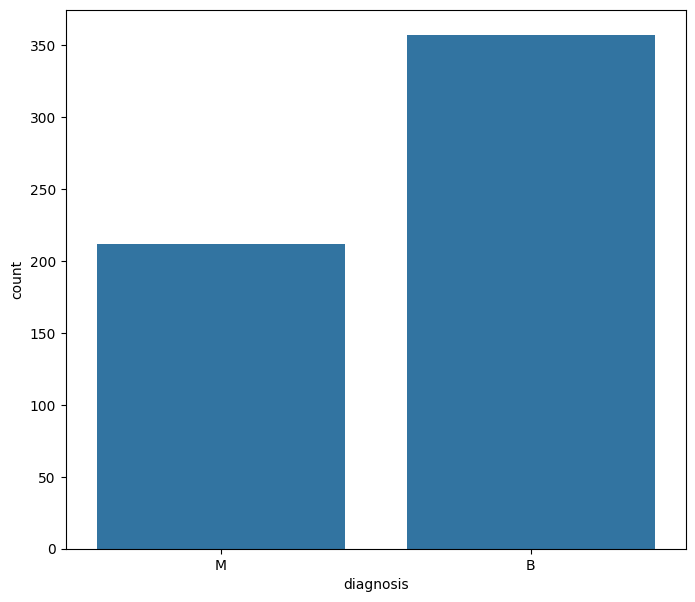

In [ ]:
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df)

In [ ]:
df.drop('id',axis=1, inplace=True)


<Axes: >

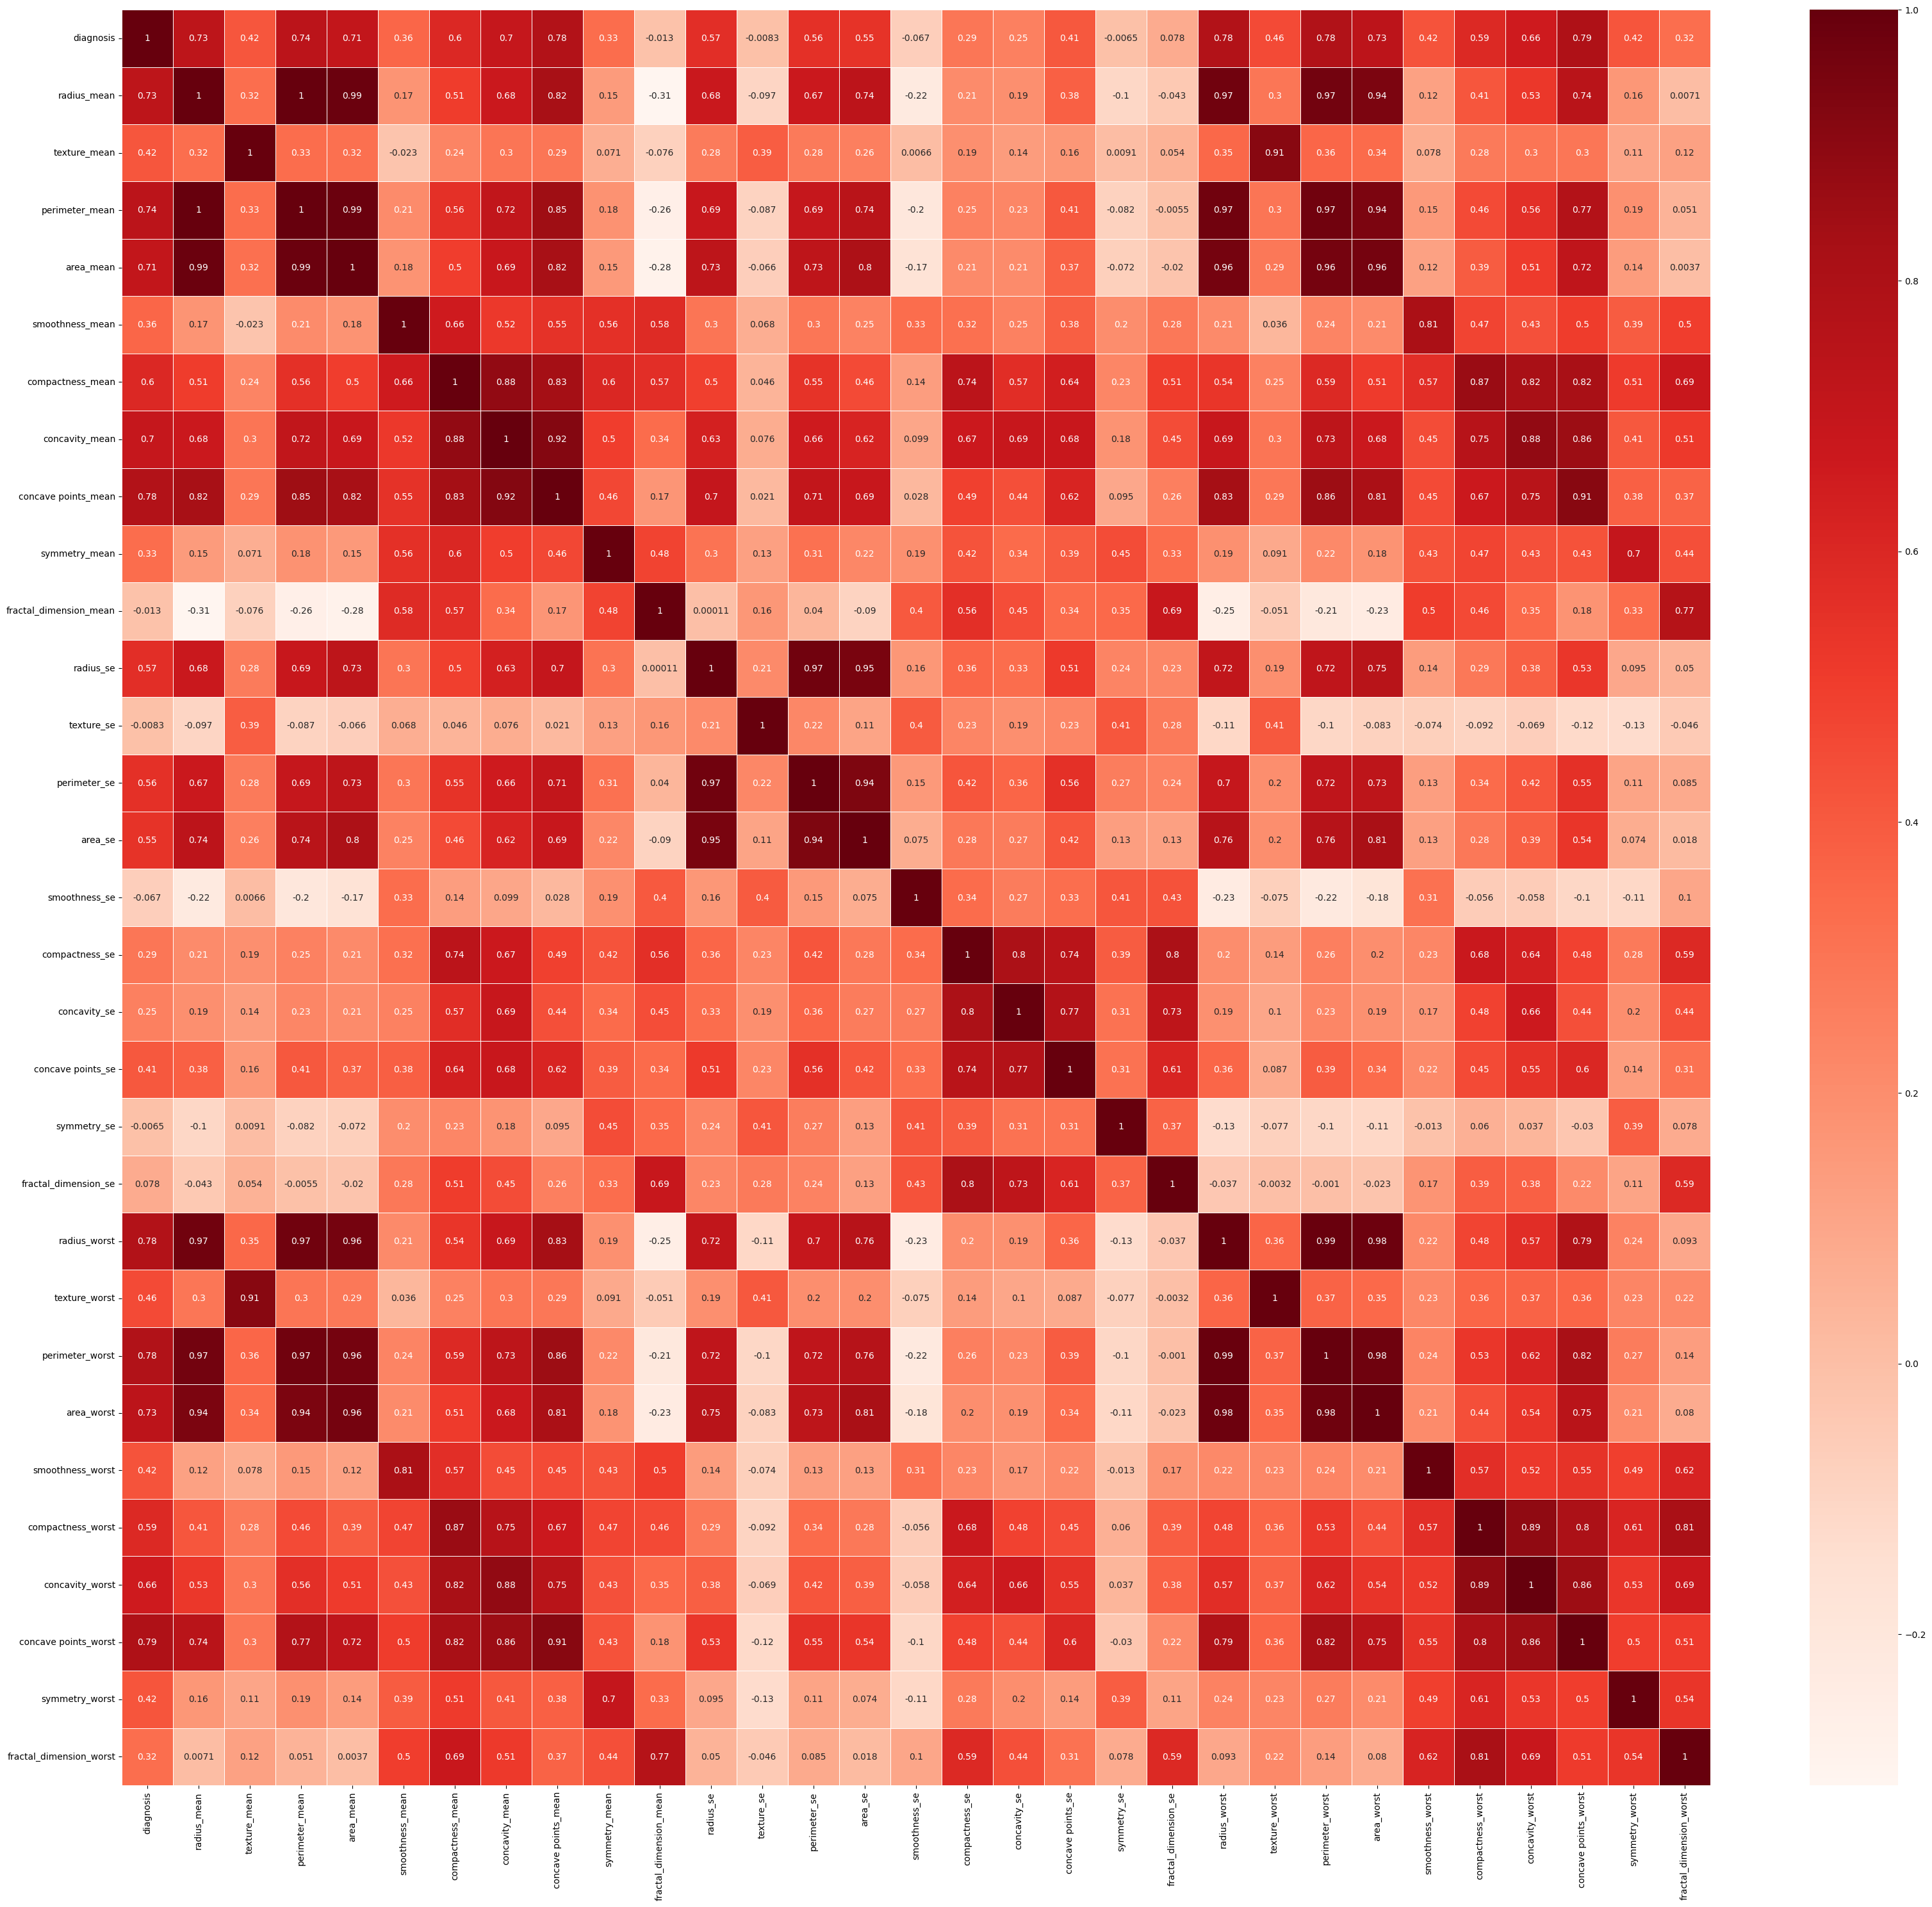

In [ ]:
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
plt.figure(figsize=(40,36))
sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap="Reds")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)


Shape of training set: (455, 30)
Shape of test set: (114, 30)


In [ ]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.fit_transform(X_test)

In [ ]:
svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)
predictions5 = svc_model.predict(X_test)

In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions5))
print("\n")
print(classification_report(y_test, predictions5))

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



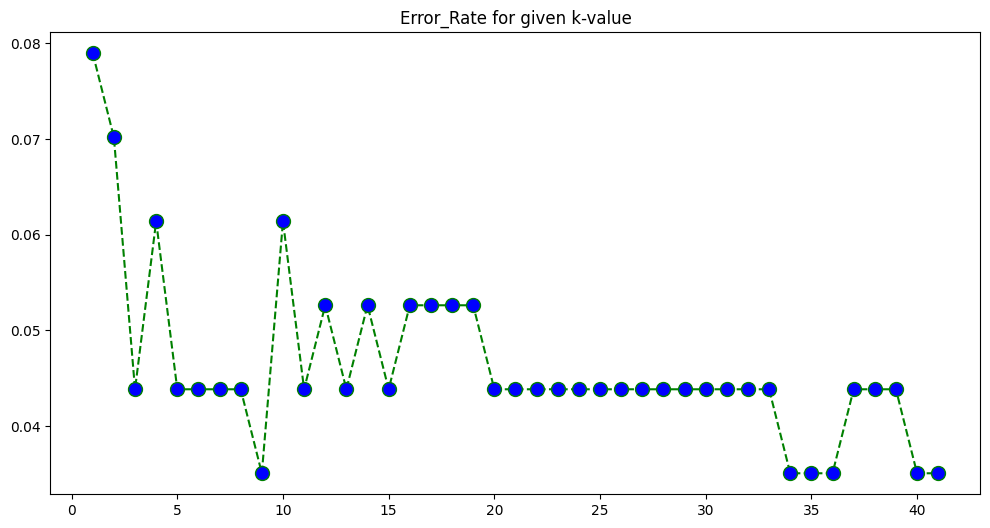

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,42), error_rate, color='green', linestyle="--",
         marker='o', markersize=10, markerfacecolor='b')
plt.title('Error_Rate for given k-value')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
predictions4 = rfc.predict(X_test)
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions4))
print("\n")
print(classification_report(y_test, predictions4))

Confusion Matrix: 
 [[70  1]
 [ 3 40]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



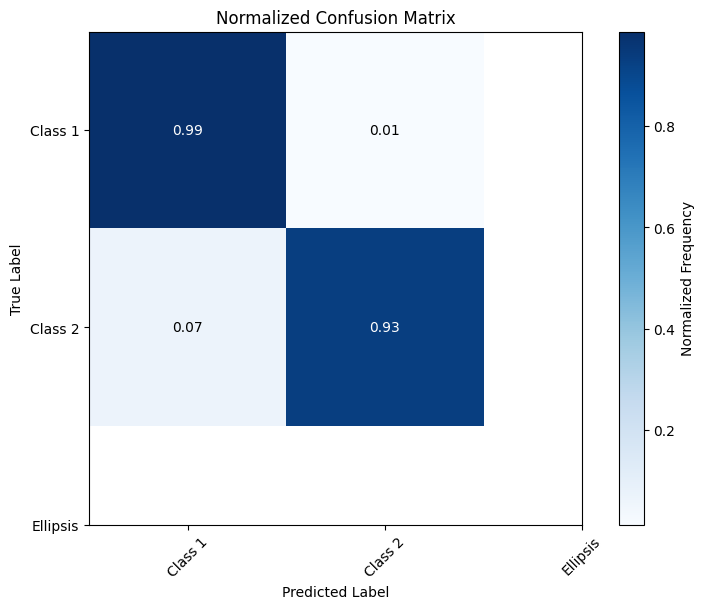

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already imported necessary libraries (sklearn.ensemble, etc.)
# and have your trained model (rfc), training labels (y_train), and test labels (y_test)

# Get the confusion matrix
y_pred = rfc.predict(X_test)  # Make predictions using the trained model
cm = confusion_matrix(y_test, y_pred)

# Create a new figure for clarity
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Create a normalized confusion matrix for better visualization (optional)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Customize the confusion matrix plot
plt.imshow(cm_normalized, cmap=plt.cm.Blues)  # Use a colormap suitable for confusion matrices
plt.colorbar(label='Normalized Frequency')
plt.title('Normalized Confusion Matrix')

# Add labels and ticks for better readability
class_names = ['Class 1', 'Class 2', ...]  # Replace with your actual class names
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)  # Rotate class names for better visibility
plt.yticks(tick_marks, class_names)

# Annotate the confusion matrix with counts and normalized values (optional)
fmt = '.2f'  # Format for displaying values
thresh = cm_normalized.max() / 2  # Threshold for color intensity in annotations
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        plt.text(j, i, format(cm_normalized[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm_normalized[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Accuracy: 0.98


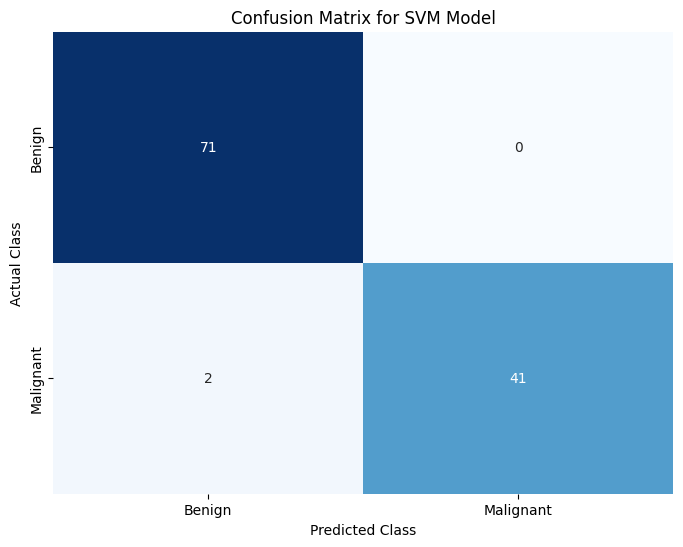

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming the necessary libraries have been imported and data split as per the previous code
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Standardize the data
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)  # Note: We should transform test set instead of fit_transform to avoid data leakage

# Train the SVM model
svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)

# Make predictions
predictions5 = svc_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions5)

# Accuracy
accuracy = accuracy_score(y_test, predictions5)
print(f"Accuracy: {accuracy:.2f}")

# Define the target names (Benign and Malignant)
target_names = ['Benign', 'Malignant']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=target_names, yticklabels=target_names)

plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)
print(confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

[[69  2]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



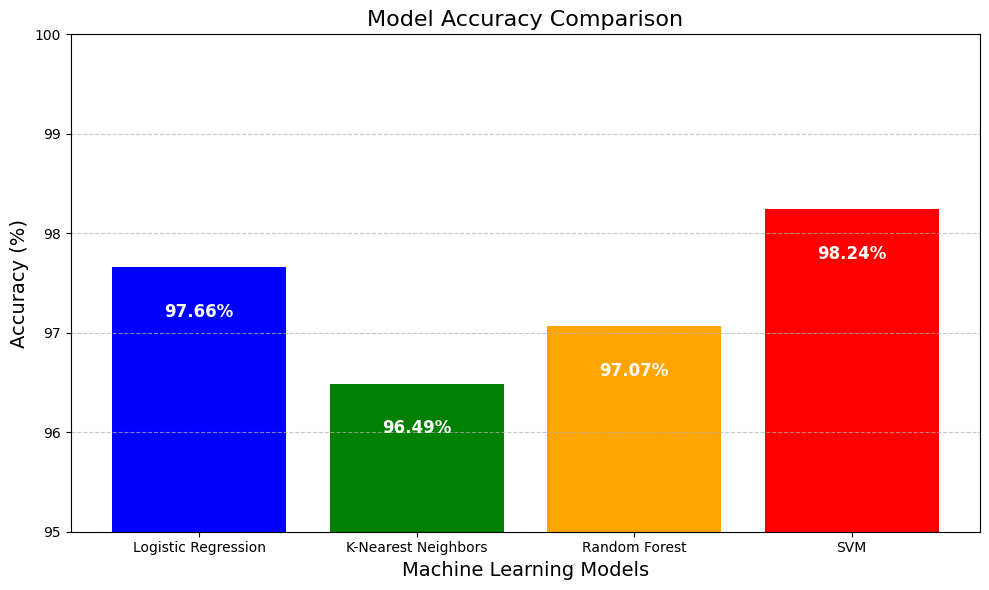

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their respective accuracy scores
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'SVM']
accuracies = [97.66, 96.49, 97.07, 98.24]  # Accuracy values

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])

# Annotate each bar with the accuracy value
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5,
             f'{accuracy:.2f}%', ha='center', color='white', fontsize=12, fontweight='bold')

# Customize the plot
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Machine Learning Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(95, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the graph
plt.tight_layout()
plt.show()
